# Letras griegas y sensibilidades de las opciones

<left>
<img src="imgs/greeks.PNG"  alt="drawing" width="30%"/>
</left>

Las griegas de las opciones se utilizan para medir el riesgo de una opción y para calibrar la sensibilidad de una opción a las variables que componen ese riesgo.

Dicho de otra manera, las griegas representan las diferentes dimensiones de riesgo que intervienen en la negociación de opciones.

Estas dimensiones se denominan colectivamente "las griegas". Las griegas incluyen variables representadas por las letras griegas **Delta, Gamma, Theta, Vega y Rho**.

In [2]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
plt.style.use('ggplot')
%matplotlib widget


Este notebook está basado en el tutorial de [Quantconnect](https://www.quantconnect.com/tutorials/introduction-to-options/the-greek-letters).

Importamos la clase BsmModel del módulo options

In [4]:
from options import BsmModel

Para analizar cómo cambian los valores de las griegas con el tiempo hasta el vencimiento y el precio subyacente, elegimos 60 * 20 contratos de opciones de compra con:
* el precio de las acciones entre 10 y 70

* el tiempo hasta el vencimiento entre 0 y 1 año

* el valor de strike de todos los contratos es 40

* el tipo de interés es 0,1

* la volatilidad es de 0,5. Construimos los datos de los contratos como una matriz de 20*60.

Generamos arrays de precios de ejercicio y fechas de vencimiento

In [8]:
np.arange(1,12.5,0.6)/12

array([0.08333333, 0.13333333, 0.18333333, 0.23333333, 0.28333333,
       0.33333333, 0.38333333, 0.43333333, 0.48333333, 0.53333333,
       0.58333333, 0.63333333, 0.68333333, 0.73333333, 0.78333333,
       0.83333333, 0.88333333, 0.93333333, 0.98333333, 1.03333333])

In [9]:
s = np.array([range(10,70,1) for i in range(20)])
I = np.ones((s.shape))
time = np.arange(1,12.5,0.6)/12  # tiempos (en años) hasta vcto para que haya 20 muestras
T = np.array([ele for ele in time for i in range(s.shape[1])]).reshape(s.shape)

Generamos los contratos de opciones

In [10]:
K = 40
r = 0.1
sigma = 0.5
contracts = []
for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        contracts.append(BsmModel('c', s[i,j], K*I[i,j], r*I[i,j], T[i,j], sigma*I[i,j]))

Calculamos los valores delas griegas para cada uno de los contratos

In [11]:
delta = [x.delta() for x in contracts]
gamma = [x.gamma() for x in contracts]
theta = [x.theta() for x in contracts]
vega = [x.vega() for x in contracts]
rho = [x.rho() for x in contracts]

Los damos las dimensiones de 20 * 60

In [12]:
delta = np.array(delta).reshape(s.shape)
gamma = np.array(gamma).reshape(s.shape)
theta = np.array(theta).reshape(s.shape)
vega = np.array(vega).reshape(s.shape)
rho = np.array(rho).reshape(s.shape)

## Delta

$delta(call) = \partial c/\partial S = e^{-q(T-t)}N(d_{1})$

$delta(put) = \partial p/\partial S = e^{-q(T-t)}(N(d_{1})-1)$

### FACTORES DE IMPACTO:

* **Precio de la acción:** 

    * La opción de compra tiene un rango Delta positivo de 0 a 1. El Delta está positivamente correlacionado con el cambio del precio de la acción subyacente.
    * La opción de venta tiene una Delta negativa que va de -1 a 0, su Delta está correlacionada negativamente con la variación del precio de la acción subyacente.
        
    * Las opciones de compra at-the-money suelen tener una Delta cercana a 0,50.
    * Las opciones de venta at-the-money tienen un Delta cercano a -0.50.

* **Volatilidad implícita:** Las acciones de baja volatilidad implícita tenderán a tener una mayor Delta para las opciones in-the-money y una menor Delta para las opciones out-of-the-money.

* **Días restantes hasta el vencimiento:** A medida que se acerca el vencimiento (siempre que los demás factores se mantengan constantes):

    * In-the-money: las deltas de las opciones aumentan hacia 1,00

    * At-the-money: las deltas de las opciones se mantienen en torno a 0,5

    * Out-of-the-money: las deltas de las opciones caen a 0.


Como regla general, las opciones in-the-money se moverán más que las opciones out-of-the-money, y las opciones a corto plazo reaccionarán más que las opciones a largo plazo ante el mismo cambio de precio en la acción.

Primero, veamos cómo varía delta en función del valor del activo subyacente.

In [13]:
contracts_s = []
i=3 # fijo una muestra de valores del activo

for j in range(s.shape[1]):
        contracts_s.append(BsmModel('c',s[i,j],40*I[i,j],0.1*I[i,j], T[i,j],0.5*I[i,j]))

delta_s = [x.delta() for x in contracts_s]

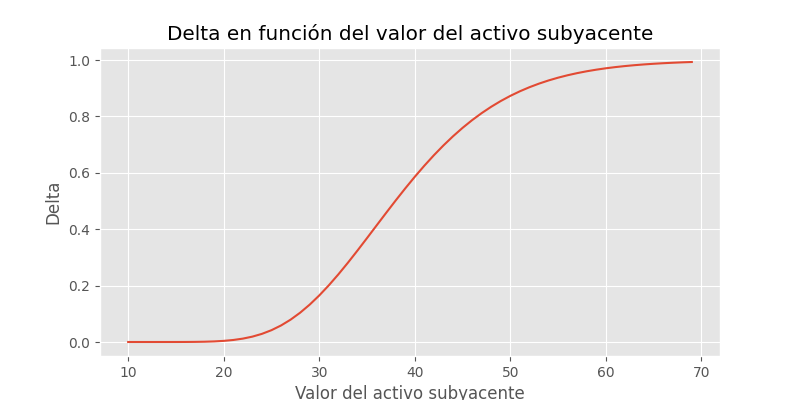

In [14]:
ax, fig = plt.subplots(figsize=(8,  4))
plt.plot(s[0], delta_s)
plt.title('Delta en función del valor del activo subyacente')
plt.xlabel('Valor del activo subyacente')
plt.ylabel('Delta')
plt.show()

Ahora veamos cómo varía delta en función del valor del activo subyacente y del tiempo hasta el vencimiento.

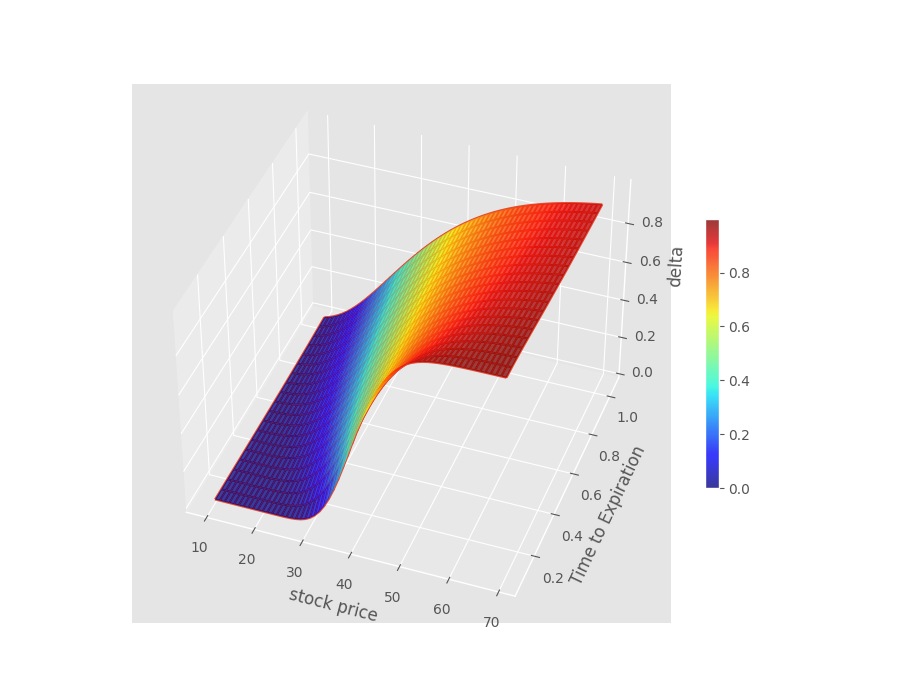

In [15]:
z = delta
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,290)
ax.plot_wireframe(np.array(s), np.array(T), z, rstride=1, cstride=1)
ff = ax.plot_surface(s, T, z, cmap=cm.jet,linewidth=0.001, rstride=1, cstride=1, alpha = 0.75)
ax.set_zlim3d(0, z.max())
ax.set_xlabel('stock price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('delta')

fig.colorbar(ff, shrink=0.5, aspect=20)

## gamma

La **gamma** es la tasa de variación de la delta del activo con respecto al precio.

Representa la sensibilidad de segundo orden de la opción a un movimiento en el precio del activo subyacente.

Las opciones largas, ya sean de compra o de venta, siempre dan una Gamma positiva.

La Gamma es mayor para las opciones at-the-money y más cercanas al vencimiento 

Las opciones deep-in-the-money o farther-out-of-the-money tienen una Gamma más baja porque sus Deltas ya se han acercado a 0 o 1,00 (o 0 o -1,00 para las puts) y no cambiarán tan rápidamente con el movimiento del subyacente.

$gamma(call) = gamma(put) = \frac{N^{'}(d_{1})e^{-q(T-t)}}{S\sigma \sqrt{(t-t)}}$

In [16]:
contracts_s = []
i=3 # fijo una muestra de valores del activo

for j in range(s.shape[1]):
        contracts_s.append(BsmModel('c',s[i,j],40*I[i,j],0.1*I[i,j], T[i,j],0.5*I[i,j]))

gamma_s = [x.gamma() for x in contracts_s]

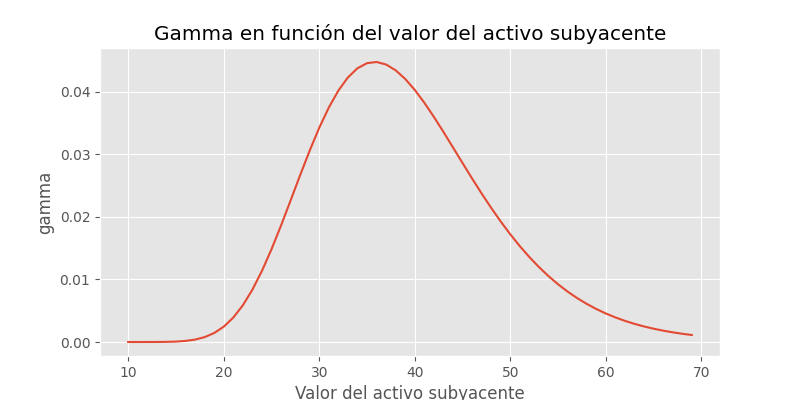

In [17]:
ax, fig = plt.subplots(figsize=(8,  4))
plt.plot(s[0], gamma_s)
plt.title('Gamma en función del valor del activo subyacente')
plt.xlabel('Valor del activo subyacente')
plt.ylabel('gamma')
plt.show()

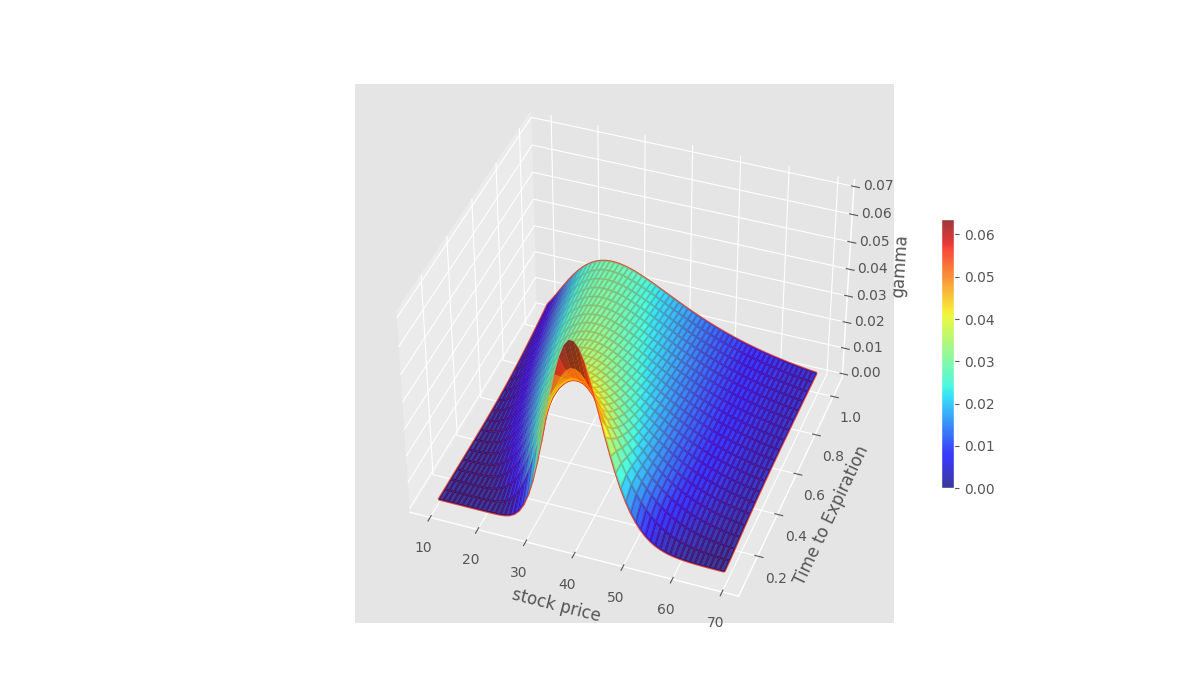

In [21]:
z = gamma
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,290)
ax.plot_wireframe(np.array(s), np.array(T), z, rstride=1, cstride=1)
ff = ax.plot_surface(s, T, z, cmap=cm.jet,linewidth=0.001, rstride=1, cstride=1, alpha = 0.75)
ax.set_zlim3d(0, z.max())
ax.set_xlabel('stock price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('gamma')

fig.colorbar(ff, shrink=0.5, aspect=20)

## Vega

Vega es la tasa de variación del valor de la opción con respecto a la volatilidad del activo subyacente.

Vega es siempre positiva para las posiciones largas y tiene el mismo valor tanto para las opciones de venta como para las de compra.

El precio de la opción siempre aumenta a medida que aumenta la volatilidad. 

$vega(call) = vega(put) = S\sqrt{(T-t)}N^{'}(d_{1})e^{-q(T-t)}$

In [24]:
contracts_s = []
i=3 # fijo una muestra de valores del activo

for j in range(s.shape[1]):
        contracts_s.append(BsmModel('c',s[i,j],40*I[i,j],0.1*I[i,j], T[i,j],0.5*I[i,j]))

vega_s = [x.vega() for x in contracts_s]

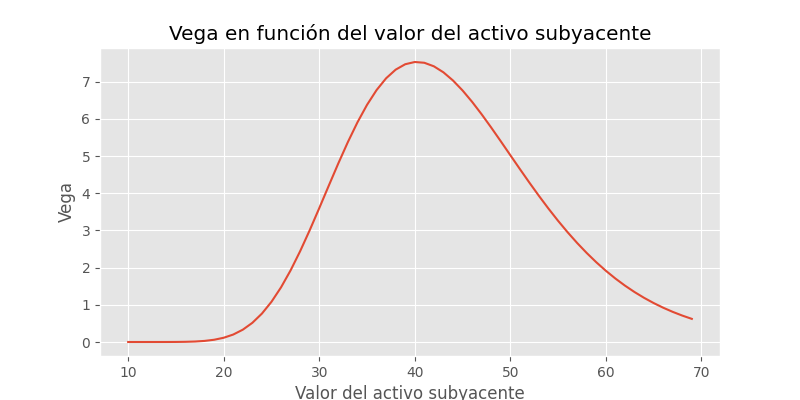

In [26]:
ax, fig = plt.subplots(figsize=(8,  4))
plt.plot(s[0], vega_s)
plt.title('Vega en función del valor del activo subyacente')
plt.xlabel('Valor del activo subyacente')
plt.ylabel('Vega')
plt.show()

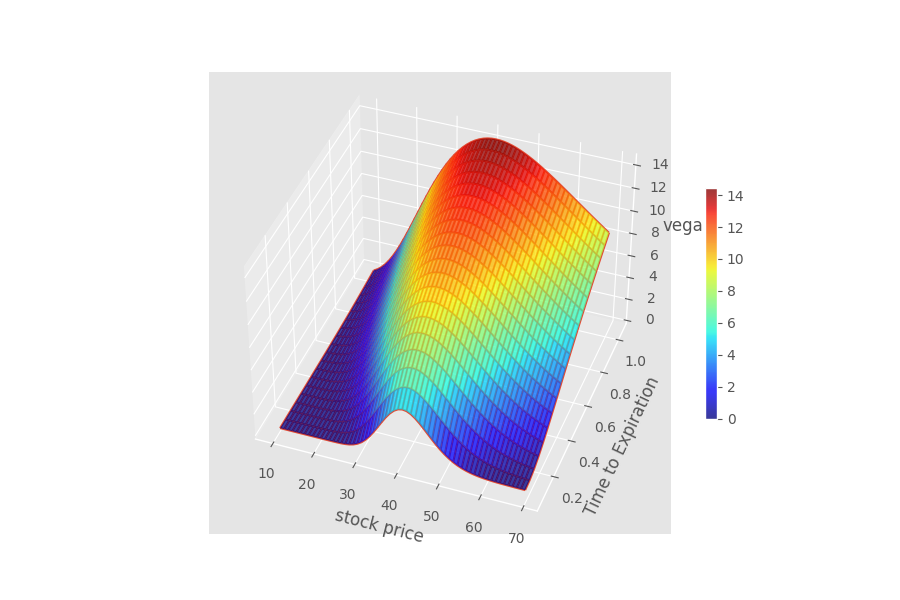

In [22]:
z = vega
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,290)
ax.plot_wireframe(np.array(s), np.array(T), z, rstride=1, cstride=1)
ff = ax.plot_surface(s, T, z, cmap=cm.jet,linewidth=0.001, rstride=1, cstride=1, alpha = 0.75)
ax.set_zlim3d(0, z.max())
ax.set_xlabel('stock price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('vega')

fig.colorbar(ff, shrink=0.5, aspect=20)

## Theta

Theta es la tasa de variación del valor de la opción con respecto al paso del tiempo. También se conoce como el decaimiento temporal de la cartera.

La theta de mantener una posición larga de una opción de compra o de venta suele ser negativa.

Una opción que pierde un 0,1% al día se dice que tiene una Theta de -0,1%.

Por ejemplo, si compramos una opción de compra OTM, el valor de esta opción de compra disminuye a medida que pasa el tiempo, ya que la opción tiene menos tiempo hasta el vencimiento. Si el tiempo transcurre manteniendo el precio del activo subyacente y su volatilidad, el paso del tiempo reducirá el valor de la opción.

$Theta(call) = \frac{-SN^{'}(d_{1})\sigma e^{-q(T-t)}}{2\sqrt{T-t}}+qSN(d_{1})e^{-q(T-t)}-rKe^{-q(T-t)}N(d_{2})$

$Theta(put) = \frac{-SN^{'}(d_{1})\sigma e^{-q(T-t)}}{2\sqrt{T-t}}+qSN(-d_{1})e^{-q(T-t)}-rKe^{-q(T-t)}N(-d_{2})$

In [28]:
contracts_s = []
i=3 # fijo una muestra de valores del activo

for j in range(s.shape[1]):
        contracts_s.append(BsmModel('c',s[i,j],40*I[i,j],0.1*I[i,j], T[i,j],0.5*I[i,j]))

theta_s = [x.theta() for x in contracts_s]

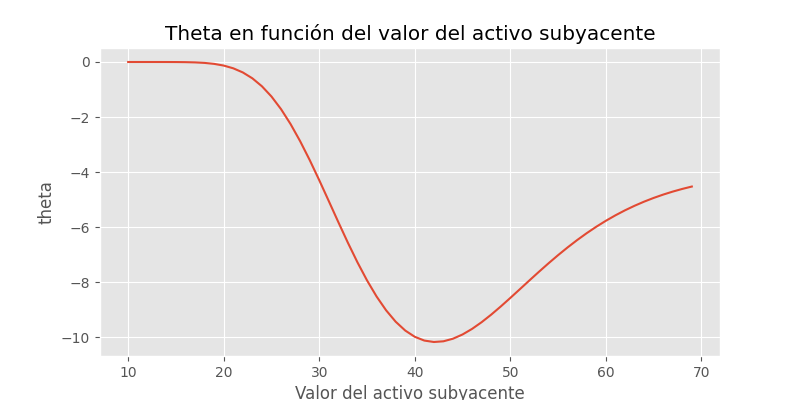

In [30]:
ax, fig = plt.subplots(figsize=(8,  4))
plt.plot(s[0], theta_s)
plt.title('Theta en función del valor del activo subyacente')
plt.xlabel('Valor del activo subyacente')
plt.ylabel('theta')
plt.show()

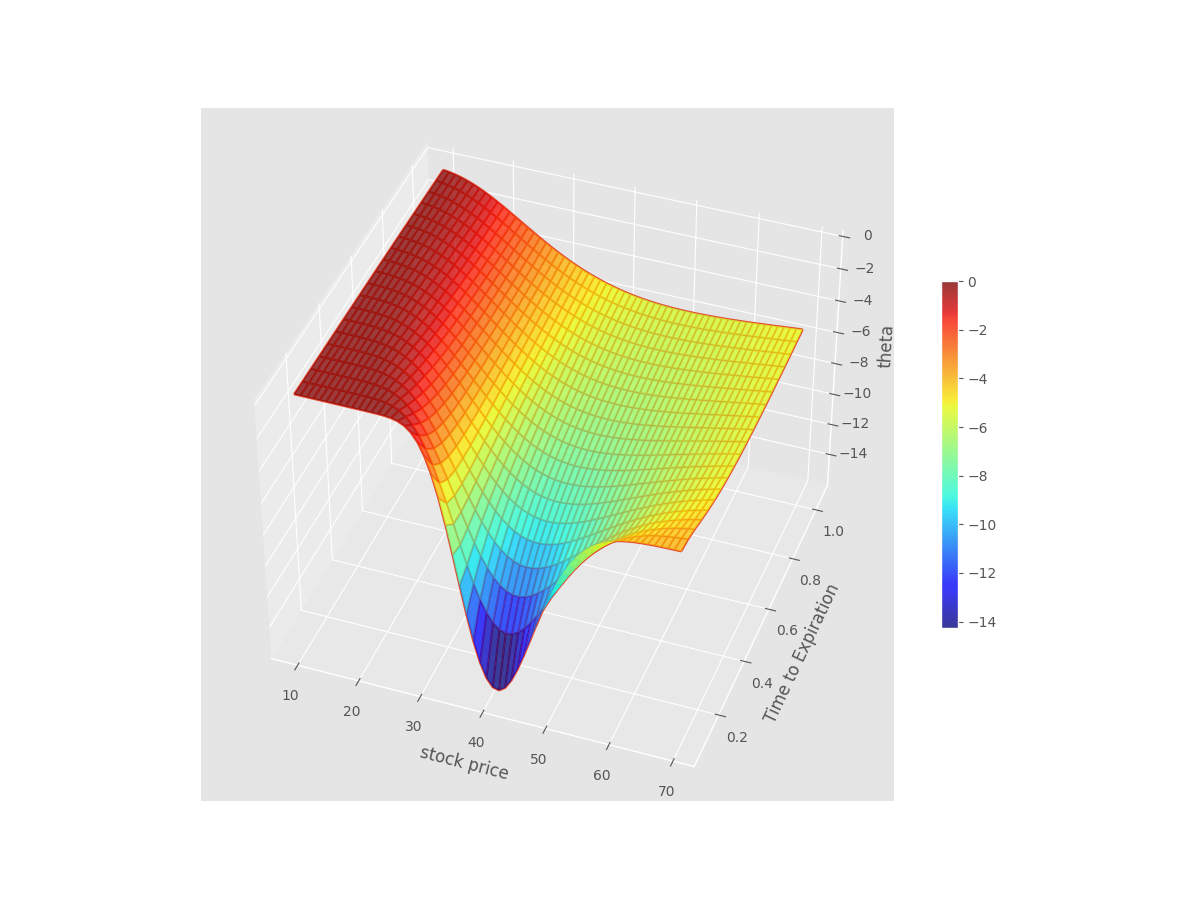

In [27]:
z = theta
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,290)
ax.plot_wireframe(np.array(s), np.array(T), z, rstride=1, cstride=1)
ff = ax.plot_surface(s, T, z, cmap=cm.jet,linewidth=0.001, rstride=1, cstride=1, alpha = 0.75)
ax.set_zlim3d(z.min(), z.max())
ax.set_xlabel('stock price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('theta')

fig.colorbar(ff, shrink=0.5, aspect=20)